Заревич Михаил, 513-2

In [61]:
import pandas as pd
import itertools
import scipy.stats
import math
import matplotlib.pyplot as plt


Документация на pandas.DataFrame https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

Документация на scipy
https://docs.scipy.org/doc/scipy/index.htm

Статистические функции
https://docs.scipy.org/doc/scipy/tutorial/stats.html

Биномиальное распределение https://docs.scipy.org/doc/scipy/tutorial/stats/discrete_binom.html

Распределение Пуассона https://docs.scipy.org/doc/scipy/tutorial/stats/discrete_poisson.html

Нормальное распределение https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
https://pieriantraining.com/working-with-scipy-stats-norm-a-guide/


In [62]:
Nmin = 10
Nmax = 1000
step = 10

# список с количествами экспериментов
ExperimentsNumber = [i for i in range(Nmin, Nmax+1, step)]

# вероятности успеха
prob = [0.0005, 0.005, 0.05, 0.25, 0.5, 0.75, 0.9, 0.95, 0.995, 0.9995]

In [63]:
print(ExperimentsNumber)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000]


In [64]:
# для каждого количества должно быть 10 вероятностей
# experiments number, probability
# создаёт пары вида: количество экспериментов, вероятность успеха
ExNumberProb = itertools.product(ExperimentsNumber, prob)



In [65]:
ColumnNames = [ "Количество опытов, n", "Количество успехов, m", "Вероятность успеха, p", "Вероятность P(X=m) по формуле Бернулли",
                "Вероятность P(X=m) по формуле Пуассона", "Вероятность P(X=m) по формуле нормального распределения",
                "Относительная погрешность биномиального относительно Пуассона", "Относительная погрешность биномиального относительно нормального", "Относительная погрешность Пуассона относительно нормального", "Среднняя погрешность"]

In [ ]:
# это не запускать, а то придётся заново создавать эту переменную
# она, судя по всему, работает как генератор т.е. выполняется только 1 раз.
for n, p in ExNumberProb:
    print(n,p)


10 0.0005
10 0.005
10 0.05
10 0.25
10 0.5
10 0.75
10 0.9
10 0.95
10 0.995
10 0.9995
20 0.0005
20 0.005
20 0.05
20 0.25
20 0.5
20 0.75
20 0.9
20 0.95
20 0.995
20 0.9995
30 0.0005
30 0.005
30 0.05
30 0.25
30 0.5
30 0.75
30 0.9
30 0.95
30 0.995
30 0.9995
40 0.0005
40 0.005
40 0.05
40 0.25
40 0.5
40 0.75
40 0.9
40 0.95
40 0.995
40 0.9995
50 0.0005
50 0.005
50 0.05
50 0.25
50 0.5
50 0.75
50 0.9
50 0.95
50 0.995
50 0.9995
60 0.0005
60 0.005
60 0.05
60 0.25
60 0.5
60 0.75
60 0.9
60 0.95
60 0.995
60 0.9995
70 0.0005
70 0.005
70 0.05
70 0.25
70 0.5
70 0.75
70 0.9
70 0.95
70 0.995
70 0.9995
80 0.0005
80 0.005
80 0.05
80 0.25
80 0.5
80 0.75
80 0.9
80 0.95
80 0.995
80 0.9995
90 0.0005
90 0.005
90 0.05
90 0.25
90 0.5
90 0.75
90 0.9
90 0.95
90 0.995
90 0.9995
100 0.0005
100 0.005
100 0.05
100 0.25
100 0.5
100 0.75
100 0.9
100 0.95
100 0.995
100 0.9995
110 0.0005
110 0.005
110 0.05
110 0.25
110 0.5
110 0.75
110 0.9
110 0.95
110 0.995
110 0.9995
120 0.0005
120 0.005
120 0.05
120 0.25
120 0.5
120 0.75


Код, который всё считает и создаёт датафрейм.

In [66]:
# список из словарей для создания датафрейма
results = []

# пары вида: количество экспериментов, вероятность успеха
# например 10 0.0005
for n, p in ExNumberProb:

    q = 1-p

    # математическое ожидание
    mean = n*p
    # дисперсия
    variance = n*p*q

    # биномиальное распределение
    # binomial distribution
    bd = scipy.stats.binom(n, p)

    # распределение Пуассона
    # Poisson distribution
    # не pd, так как это отвечает за pandas
    poisd = scipy.stats.poisson(mean)

    # нормальное распределение с мат. ожиданием np и ско npq. Второй параметр тут - ско, а не дисперсия
    # normal distribution
    nd = scipy.stats.norm(mean, math.sqrt(variance))

    # i - количество успехов.
    # для 10 опытов это будет от 0 до 10 включительно
    #success number
    for i in range(n+1):

        # вероятности
        # pmf - probability mass function - функция вероятности, для дискретных СВ
        # pdf - probability dencity function - плотность вероятности, для непрерывных СВ
        bdprob = bd.pmf(i)
        poisdprob = poisd.pmf(i)
        ndprob = nd.pdf(i)

        # Более быстрый вариант, который мне показала Софья.
        # Заносить данные в словарь, потом создавать датафрейм из словаря. Таким образом код выполнится примерно за 4 минуты.
        # создание словаря с полученными данными
        data=[n, i, p, bdprob, poisdprob, ndprob, abs((bdprob-poisdprob)/bdprob), abs((bdprob-ndprob)/bdprob), abs((poisdprob-ndprob)/poisdprob),(bdprob+poisdprob+ndprob)/3]
        temp = dict(zip(ColumnNames, data))
        results.append(temp)

        # Неправильный вариант.
        # Добавлять данные в датафрейм сразу. Этот вариант выполняется за 29 минут.
        #data=[[n], [i], [p], [bdprob], [poisdprob], [ndprob],  [abs(bdprob-poisdprob)], [abs(bdprob-ndprob)], [abs(poisdprob-ndprob)],[(bdprob+poisdprob+ndprob)/3]]
        # добавляет данные в датафрейм
        #newdf = pd.DataFrame(temp)
        #df = pd.concat([df,newdf], ignore_index=True,  axis = 0)

# создание датафрейма на основе списка словарей.
df = pd.DataFrame(results)


<ipython-input-66-eb1940c5ae6a>:43: RuntimeWarning: divide by zero encountered in scalar divide
  data=[n, i, p, bdprob, poisdprob, ndprob, abs((bdprob-poisdprob)/bdprob), abs((bdprob-ndprob)/bdprob), abs((poisdprob-ndprob)/poisdprob),(bdprob+poisdprob+ndprob)/3]
<ipython-input-66-eb1940c5ae6a>:43: RuntimeWarning: invalid value encountered in scalar divide
  data=[n, i, p, bdprob, poisdprob, ndprob, abs((bdprob-poisdprob)/bdprob), abs((bdprob-ndprob)/bdprob), abs((poisdprob-ndprob)/poisdprob),(bdprob+poisdprob+ndprob)/3]
<ipython-input-66-eb1940c5ae6a>:43: RuntimeWarning: overflow encountered in scalar divide
  data=[n, i, p, bdprob, poisdprob, ndprob, abs((bdprob-poisdprob)/bdprob), abs((bdprob-ndprob)/bdprob), abs((poisdprob-ndprob)/poisdprob),(bdprob+poisdprob+ndprob)/3]


In [69]:
df

,"Количество опытов, n","Количество успехов, m","Вероятность успеха, p",Вероятность P(X=m) по формуле Бернулли,Вероятность P(X=m) по формуле Пуассона,Вероятность P(X=m) по формуле нормального распределения,Относительная погрешность биномиального относительно Пуассона,Относительная погрешность биномиального относительно нормального,Относительная погрешность Пуассона относительно нормального,Среднняя погрешность
0,10,0,0.0005,9.950112e-01,9.950125e-01,5.629209e+00,0.000001,4.657433,4.657426,2.539744e+00
1,10,1,0.0005,4.977545e-03,4.975062e-03,5.417331e-43,0.000499,1.000000,1.000000,3.317536e-03
2,10,2,0.0005,1.120508e-05,1.243766e-05,6.527934e-173,0.110002,1.000000,1.000000,7.880912e-06
3,10,3,0.0005,1.494758e-08,2.072943e-08,0.000000e+00,0.386808,1.000000,1.000000,1.189234e-08
4,10,4,0.0005,1.308567e-11,2.591178e-11,0.000000e+00,0.980164,1.000000,1.000000,1.299915e-11
...,...,...,...,...,...,...,...,...,...,...
505995,1000,996,0.9995,1.572995e-03,1.256260e-02,2.683891e-06,6.986424,0.998294,0.999786,4.712760e-03
505996,1000,997,0.9995,1.261551e-02,1.259410e-02,1.086014e-03,0.001697,0.913914,0.913768,8.765209e-03
505997,1000,998,0.9995,7.580683e-02,1.261303e-02,5.941311e-02,0.833616,0.216257,3.710454,4.927766e-02
505998,1000,999,0.9995,3.033791e-01,1.261934e-02,4.394462e-01,0.958404,0.448505,33.823223,2.518149e-01


In [ ]:
# сохраню этот файл себе, чтобы потом не считать всё снова.
df.to_csv("ТВиМС 2 работа, датафрейм.csv", sep=',', encoding='utf-8')
df.to_excel("ТВиМС 2 работа, датафрейм.xlsx")

In [70]:
# Стандартное отклонение для каждого столбца
df.std()


,0
"Количество опытов, n",2.370814e+02
"Количество успехов, m",2.371065e+02
"Вероятность успеха, p",4.078056e-01
Вероятность P(X=m) по формуле Бернулли,2.052703e-02
Вероятность P(X=m) по формуле Пуассона,1.475989e-02
Вероятность P(X=m) по формуле нормального распределения,2.810097e-02
Относительная погрешность биномиального относительно Пуассона,NaN
Относительная погрешность биномиального относительно нормального,4.954568e+79
Относительная погрешность Пуассона относительно нормального,7.763429e+31
Среднняя погрешность,1.952391e-02


# Ответы на контрольные вопросы





У меня возникли некоторые проблемы с интерпретацией результатов. Согласно теории, чем больше количество опытов, тем точнее будут рабтать приблжённые формулы для вычисления вероятностей биномиального распределения. Мои расчёты показывают иное, но, с другой стороны, когда относительная погрешность была слишком большой, вероятнсти были порядка 10^(-50) или 10^(-100), то относительная погрешность между ними в 10^(50) на деле такой уж большой не выглядит.

## 1 Для каких пар значений n, p применимо приближённое вычисление вероятности при помощи распределения Пуассона?

Распределение Пуассона, вместо биномиального, можно применять, если вероятность успеха p стремится к нулю, а число экспериментов n - к бесконечности.

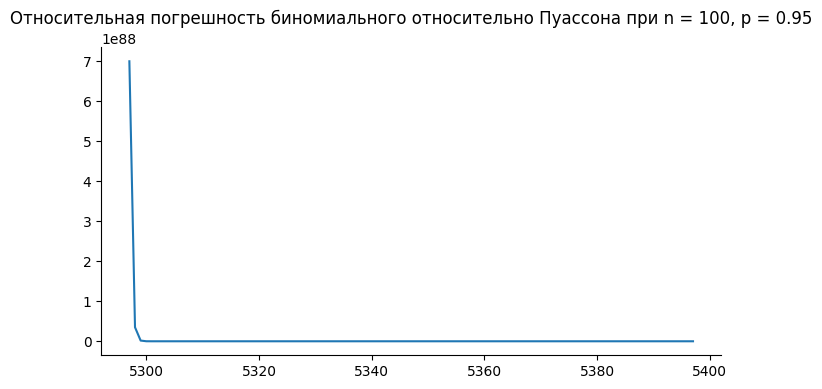

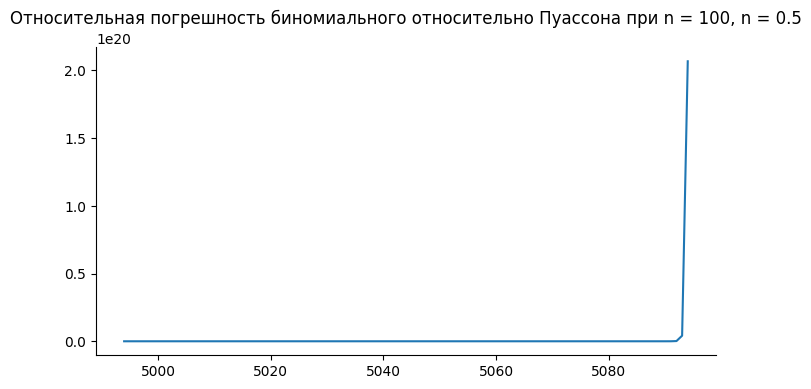

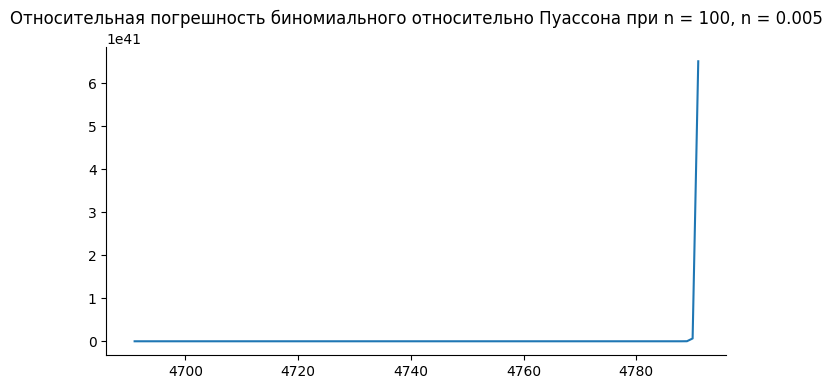

In [94]:


df1 = df[df['Количество опытов, n'] == 100]
df1 = df1[df1['Вероятность успеха, p'] == 0.95]

df1['Относительная погрешность биномиального относительно Пуассона'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно Пуассона при n = 100, p = 0.95')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

df2 = df[df['Количество опытов, n'] == 100]
df2 = df2[df2['Вероятность успеха, p'] == 0.5]

df2['Относительная погрешность биномиального относительно Пуассона'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно Пуассона при n = 100, n = 0.5')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

df3 = df[df['Количество опытов, n'] == 100]
df3 = df3[df3['Вероятность успеха, p'] == 0.005]

df3['Относительная погрешность биномиального относительно Пуассона'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно Пуассона при n = 100, n = 0.005')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

Вот ситуация, про которую я говорил выше. Обратите внимание на последние строки. Относительная погрешность очень большая, но сами вероятности такие маленькие, что событие можно считать невозможным, поэтому разницей можно пренебречь.

In [90]:
df3

,"Количество опытов, n","Количество успехов, m","Вероятность успеха, p",Вероятность P(X=m) по формуле Бернулли,Вероятность P(X=m) по формуле Пуассона,Вероятность P(X=m) по формуле нормального распределения,Относительная погрешность биномиального относительно Пуассона,Относительная погрешность биномиального относительно нормального,Относительная погрешность Пуассона относительно нормального,Среднняя погрешность
4691,100,0,0.005,6.057704e-01,6.065307e-01,0.439941,1.254969e-03,0.273750,0.274660,5.507473e-01
4692,100,1,0.005,3.044073e-01,3.032653e-01,0.439941,3.751306e-03,0.445238,0.450680,3.492045e-01
4693,100,2,0.005,7.571939e-02,7.581633e-02,0.058944,1.280253e-03,0.221545,0.222540,7.015995e-02
4694,100,3,0.005,1.242965e-02,1.263606e-02,0.001058,1.660597e-02,0.914872,0.916262,8.707940e-03
4695,100,4,0.005,1.514668e-03,1.579507e-03,0.000003,4.280716e-02,0.998320,0.998389,1.032240e-03
...,...,...,...,...,...,...,...,...,...,...
4787,100,96,0.005,4.851036e-215,7.719737e-180,0.000000,1.591358e+35,1.000000,1.000000,2.573246e-180
4788,100,97,0.005,1.005240e-218,3.979246e-182,0.000000,3.958504e+36,1.000000,1.000000,1.326415e-182
4789,100,98,0.005,1.546364e-222,2.030228e-184,0.000000,1.312904e+38,1.000000,1.000000,6.767425e-185
4790,100,99,0.005,1.569833e-226,1.025367e-186,0.000000,6.531697e+39,1.000000,1.000000,3.417892e-187


Пример того, что компьютер окгуляет слишком маленькиие значения до нуля.

In [81]:
df1 = df[df['Количество опытов, n'] == 1000]
df1 = df1[df1['Вероятность успеха, p'] == 0.95]
df1.head(20)

,"Количество опытов, n","Количество успехов, m","Вероятность успеха, p",Вероятность P(X=m) по формуле Бернулли,Вероятность P(X=m) по формуле Пуассона,Вероятность P(X=m) по формуле нормального распределения,Относительная погрешность биномиального относительно Пуассона,Относительная погрешность биномиального относительно нормального,Относительная погрешность Пуассона относительно нормального,Среднняя погрешность
502997,1000,0,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0
502998,1000,1,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0
502999,1000,2,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0
503000,1000,3,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0
503001,1000,4,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0
503002,1000,5,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0
503003,1000,6,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0
503004,1000,7,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0
503005,1000,8,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0
503006,1000,9,0.95,0.0,0.0,0.0,NaN,NaN,NaN,0.0


## 2 Для каких пар значений n, p применимо приближённое вычисление вероятности при помощи локальной теоремы Муавра-Лапласа?

см. Гнеденко, стр 96-97
https://psv4.userapi.com/s/v1/d/6NMy4u3YcDHrFFcPKRzzAcW4_7z4LEgd4Q-FoWYiOUUyp_15sYs0xEiCf_TdMsFYwc_Vlf3zcBsJgaKAI0R3-BaNVb6xgdTK2dNGAdpFcBz8K6tHXAvEYw/Gnedenko_B_V_-_Kurs_teorii_veroyatnostey_Izd.pdf

Число n должно быть достаточно большим, больше нескольких сотен, а p - не слишком близким к нулю или единице. Формула работает тем лучше, чем больше n и чем p ближе к 0,5.

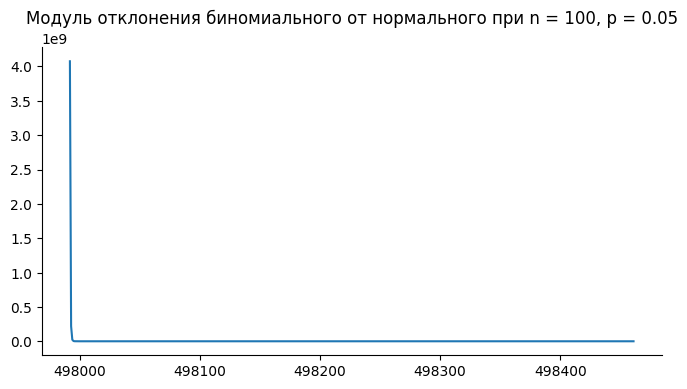

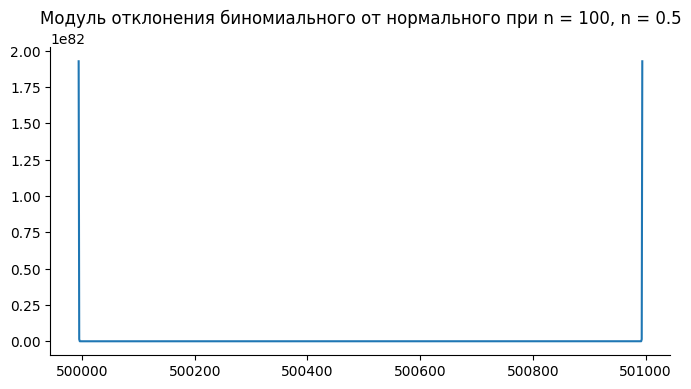

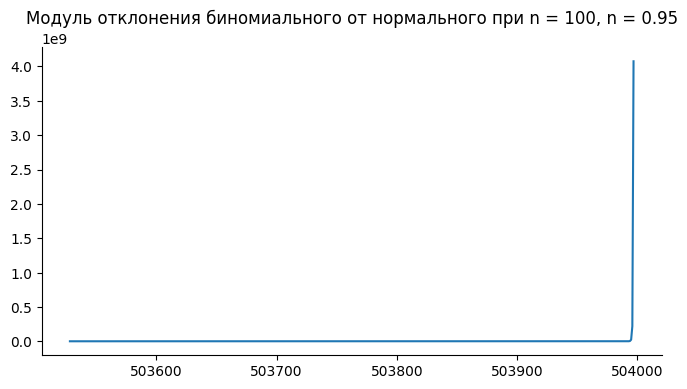

In [95]:
df1 = df[df['Количество опытов, n'] == 1000]
df1 = df1[df1['Вероятность успеха, p'] == 0.05]

df1['Относительная погрешность биномиального относительно нормального'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно нормального при n = 100, p = 0.05')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

df2 = df[df['Количество опытов, n'] == 1000]
df2 = df2[df2['Вероятность успеха, p'] == 0.5]

df2['Относительная погрешность биномиального относительно нормального'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно нормального при n = 100, n = 0.5')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

df3 = df[df['Количество опытов, n'] == 1000]
df3 = df3[df3['Вероятность успеха, p'] == 0.95]

df3['Относительная погрешность биномиального относительно нормального'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно нормального при n = 100, n = 0.95')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()


## 3 Как влияет на результаты увеличение значения n?
Рассмотрим отклонение биномиального от Пуассона и нормального при одной и той же вероятности, но разном количестве опытов: 50, 500, 1000. Из графиков видно, что в обоих случаях минимальное отклонение будет при самом большом n.


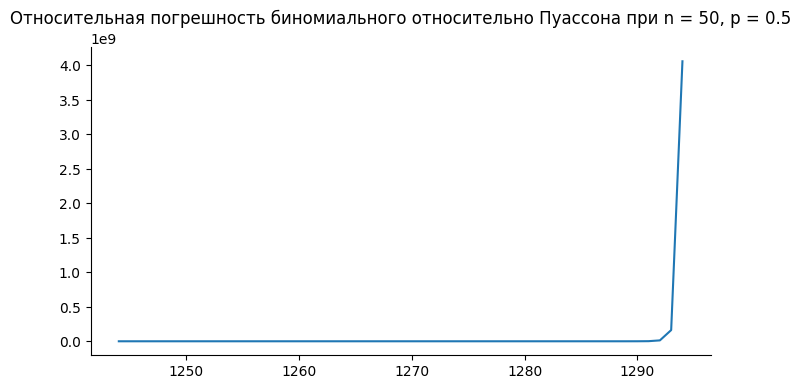

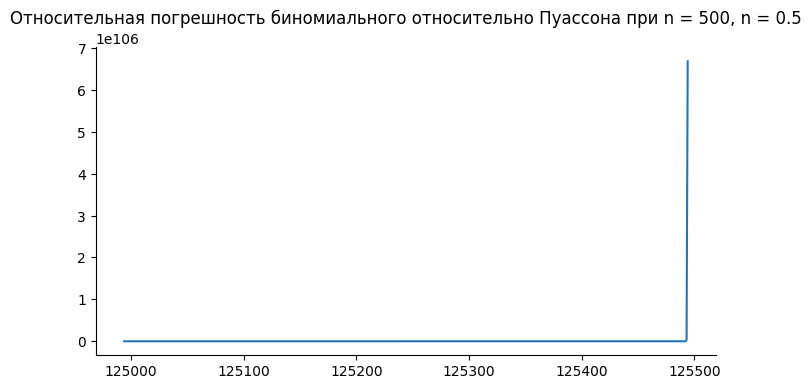

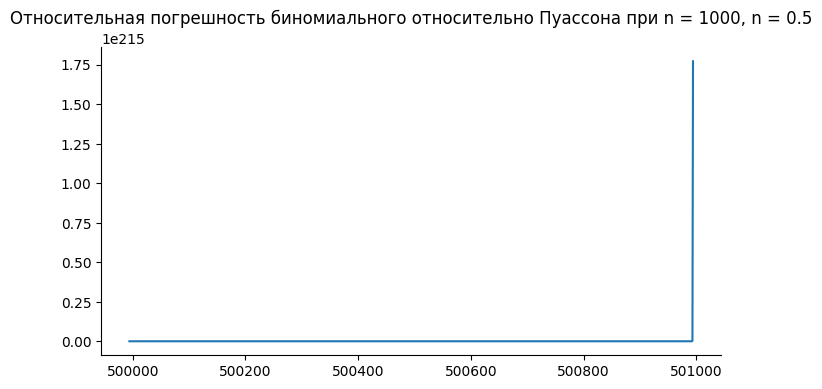

In [96]:
df1 = df[df['Количество опытов, n'] == 50]
df1 = df1[df1['Вероятность успеха, p'] == 0.5]

df1['Относительная погрешность биномиального относительно Пуассона'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно Пуассона при n = 50, p = 0.5')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

df2 = df[df['Количество опытов, n'] == 500]
df2 = df2[df2['Вероятность успеха, p'] == 0.5]

df2['Относительная погрешность биномиального относительно Пуассона'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно Пуассона при n = 500, n = 0.5')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

df3 = df[df['Количество опытов, n'] == 1000]
df3 = df3[df3['Вероятность успеха, p'] == 0.5]

df3['Относительная погрешность биномиального относительно Пуассона'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно Пуассона при n = 1000, n = 0.5')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

In [84]:
df3

/usr/local/lib/python3.11/dist-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


,"Количество опытов, n","Количество успехов, m","Вероятность успеха, p",Вероятность P(X=m) по формуле Бернулли,Вероятность P(X=m) по формуле Пуассона,Вероятность P(X=m) по формуле нормального распределения,Относительная погрешность биномиального относительно Пуассона,Относительная погрешность биномиального относительно нормального,Относительная погрешность Пуассона относительно нормального,Среднняя погрешность
499994,1000,0,0.5,9.332636e-302,7.124576e-218,1.797625e-219,7.634045e+83,1.926171e+82,0.974769,2.434780e-218
499995,1000,1,0.5,9.332636e-299,3.562288e-215,1.325621e-218,3.817022e+83,1.420415e+80,0.999628,1.187871e-215
499996,1000,2,0.5,4.661652e-296,8.905721e-213,9.736496e-218,1.910422e+83,2.088636e+78,0.999989,2.968606e-213
499997,1000,3,0.5,1.550776e-293,1.484287e-210,7.122766e-217,9.571251e+82,4.593033e+76,1.000000,4.947625e-211
499998,1000,4,0.5,3.865310e-291,1.855358e-208,5.189883e-216,4.800025e+82,1.342682e+75,1.000000,6.184528e-209
...,...,...,...,...,...,...,...,...,...,...
500990,1000,996,0.5,3.865310e-291,2.628030e-85,5.189883e-216,6.799016e+205,1.342682e+75,1.000000,8.760100e-86
500991,1000,997,0.5,1.550776e-293,1.317969e-85,7.122766e-217,8.498770e+207,4.593033e+76,1.000000,4.393230e-86
500992,1000,998,0.5,4.661652e-296,6.603051e-86,9.736496e-218,1.416462e+210,2.088636e+78,1.000000,2.201017e-86
500993,1000,999,0.5,9.332636e-299,3.304830e-86,1.325621e-218,3.541154e+212,1.420415e+80,1.000000,1.101610e-86


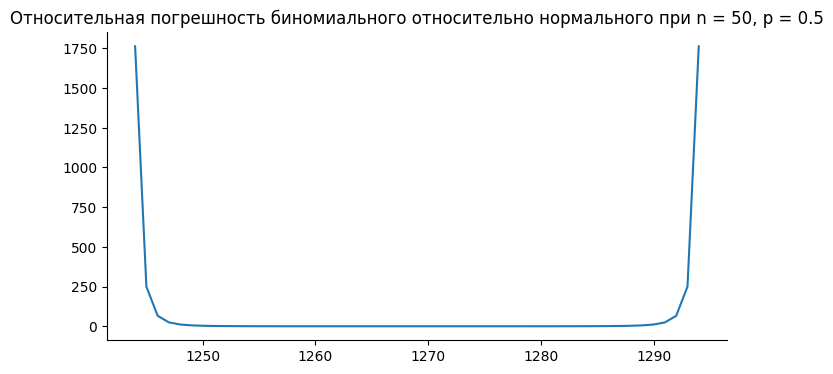

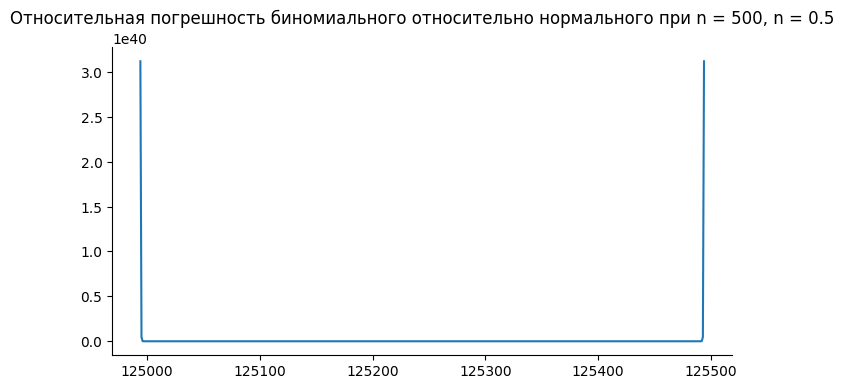

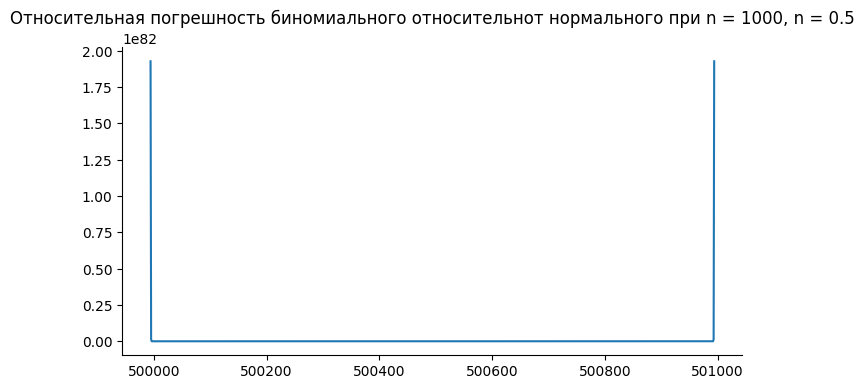

In [97]:
df1 = df[df['Количество опытов, n'] == 50]
df1 = df1[df1['Вероятность успеха, p'] == 0.5]

df1['Относительная погрешность биномиального относительно нормального'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно нормального при n = 50, p = 0.5')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

df2 = df[df['Количество опытов, n'] == 500]
df2 = df2[df2['Вероятность успеха, p'] == 0.5]

df2['Относительная погрешность биномиального относительно нормального'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительно нормального при n = 500, n = 0.5')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

df3 = df[df['Количество опытов, n'] == 1000]
df3 = df3[df3['Вероятность успеха, p'] == 0.5]

df3['Относительная погрешность биномиального относительно нормального'].plot(kind='line', figsize=(8, 4), title='Относительная погрешность биномиального относительнот нормального при n = 1000, n = 0.5')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

# Тест. Потом убрать

In [ ]:
import math
n = 100
p = 0.8
temp = scipy.stats.binom(n,p)
print(temp.cdf(101))

temp1 = scipy.stats.poisson(n*p)
print(temp1.cdf(1/(n*p)))

# математическое ожидание
mean = n*p
# дисперсия
variance = n*p*(1-p)
# нормальное распределение с мат. ожиданием np и ско npq. Второй параметр тут - ско, а не дисперсия
temp2 = scipy.stats.norm(mean,math.sqrt(variance))
print(temp2.cdf(mean+3*math.sqrt(variance))-temp2.cdf(mean-3*math.sqrt(variance)))




1.0
1.804851387845408e-35
0.9973002039367398


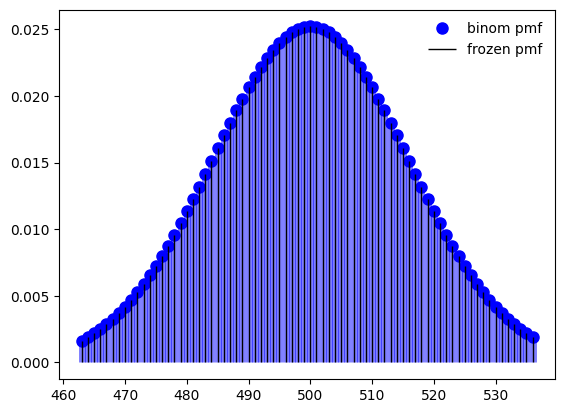

In [ ]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, p = 1000, 0.5
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

rv = binom(n, p)
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
        label='frozen pmf')
ax.legend(loc='best', frameon=False)
plt.show()